In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [7]:
path = untar_data(URLs.PETS)
path

PosixPath('/Users/nilesh.malpeddi/.fastai/data/oxford-iiit-pet')

In [8]:
path.ls()

[PosixPath('/Users/nilesh.malpeddi/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/Users/nilesh.malpeddi/.fastai/data/oxford-iiit-pet/annotations')]

In [11]:
path_anno = path/'annotations'
path_img = path/'images'

In [12]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/Users/nilesh.malpeddi/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_167.jpg'),
 PosixPath('/Users/nilesh.malpeddi/.fastai/data/oxford-iiit-pet/images/pug_52.jpg'),
 PosixPath('/Users/nilesh.malpeddi/.fastai/data/oxford-iiit-pet/images/basset_hound_112.jpg'),
 PosixPath('/Users/nilesh.malpeddi/.fastai/data/oxford-iiit-pet/images/Siamese_193.jpg'),
 PosixPath('/Users/nilesh.malpeddi/.fastai/data/oxford-iiit-pet/images/shiba_inu_122.jpg')]

In [13]:
np.random.seed(2)
pat = r'/([^/]+)_\d+.jpg$'

In [17]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),
                                   size=224,bs=bs).normalize(imagenet_stats)

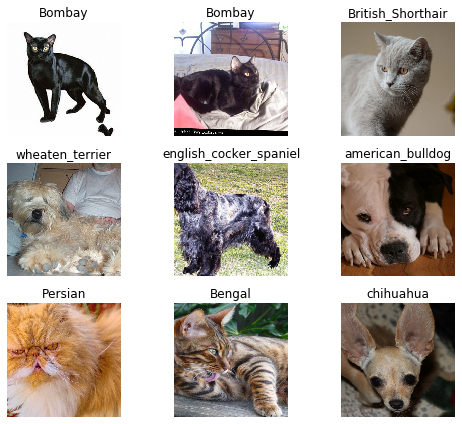

In [18]:
data.show_batch(rows=3,figsize=(7,6))

In [19]:
print(data.classes)
len(data.classes),data.c

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


(37, 37)

In [21]:
learn = cnn_learner(data,models.resnet34,metrics=error_rate)

In [22]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9,figsize=(15,11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [ ]:
interp.most_confused(min_val=2)

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(1)

In [ ]:
learn.load('stage-1')

In [ ]:
learn.lr_find()

In [ ]:
learn.recorder.plot()

In [ ]:
learn.unfreeze()
learn.fit_one_cycle(2,max_lr=slice(1e-6,1e-4))

## restnet50

In [ ]:
data = ImageDataBunch.from_name_re(path_img,fnames,pat,ds_tfms=get_transforms(),
                                  size=299,bs=bs//2).normalize(imagenet_stats)

In [ ]:
learn = cnn_learner(data,models.resnet50,metrics=error_rate)

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

In [ ]:
learn.save('stage-1-50')

In [ ]:
learn.unfreeze()

In [ ]:
learn.fit_one_cycle(3,max_lr=slice(1e-6,1e-4))

In [ ]:
learn.load('stage-1-50')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.most_confused(min_val=2)

In [33]:
path = untar_data(URLs.MNIST_SAMPLE)
path

PosixPath('/Users/nilesh.malpeddi/.fastai/data/mnist_sample')

In [34]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path,ds_tfms=tfms,size=26)

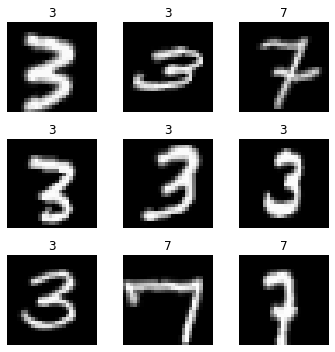

In [35]:
data.show_batch(rows=3,figsize=(5,5))

In [36]:
learn = cnn_learner(data,models.resnet18,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/nilesh.malpeddi/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 46827520/46827520 [00:06<00:00, 7648601.04it/s] 


In [37]:
learn.fit(2)

epoch     train_loss  valid_loss  accuracy  time    
0         0.174950    0.093477    0.966634  00:44     
1         0.103458    0.059045    0.980864  00:42     


In [38]:
df = pd.read_csv(path/'labels.csv')
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [40]:
data = ImageDataBunch.from_csv(path,ds_tfms=tfms,size=28)

[0, 1]

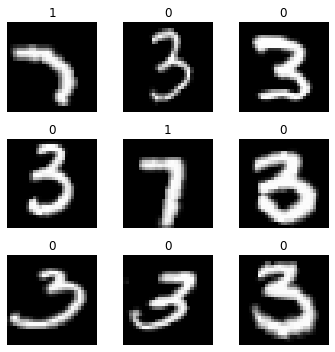

In [41]:
data.show_batch(rows=3,figsize=(5,5))
data.classes